In [ ]:
from google.colab import drive
import os
import numpy as np
import tifffile as tiff

drive.mount('/content/drive')
folder_path = '/content/drive/My Drive/hologic_data'

def is_totally_black(image):
    return np.all(image == 0)

def zero_pad(image, target_size=(512, 512)):
    height, width = image.shape[:2]
    padded_image = np.zeros((target_size[0], target_size[1]), dtype=image.dtype)
    y_offset = (target_size[0] - height) // 2
    x_offset = (target_size[1] - width) // 2
    padded_image[y_offset:y_offset + height, x_offset:x_offset + width] = image
    return padded_image

if os.path.exists(folder_path):
    print(f"Acessando a pasta: {folder_path}")

    classes = os.listdir(folder_path)
    i = 0
    j = 0
    for classe in classes:
        path_class_padding = os.path.join(folder_path, classe + '_padding')
        os.makedirs(path_class_padding, exist_ok=True)

        path = os.path.join(folder_path, classe)
        files_names = os.listdir(path)

        for file in files_names:
            file_path = os.path.join(path, file)
            try:

                image = tiff.imread(file_path)
                height, width = image.shape[:2]
                if is_totally_black(image):
                    j += 1
                    print(j)

                if height <= 512 and width <= 512 and not is_totally_black(image):
                    padded_image = zero_pad(image)
                    padded_file_path = os.path.join(path_class_padding, file)
                    tiff.imwrite(padded_file_path, padded_image)
                    i += 1

            except Exception as e:
                print(f"Erro ao processar a imagem {file}: {e}")
else:
    print(f"A pasta {folder_path} não existe.")

i

Mounted at /content/drive
Acessando a pasta: /content/drive/My Drive/hologic_data
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


1280

In [ ]:
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.2 MB/s eta 0:00:00


In [ ]:
import tifffile

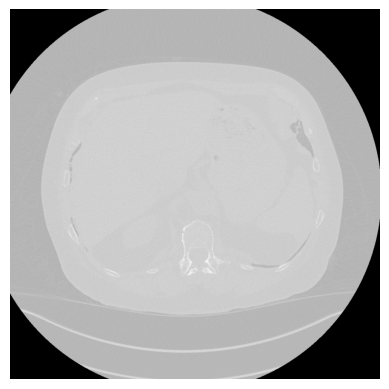

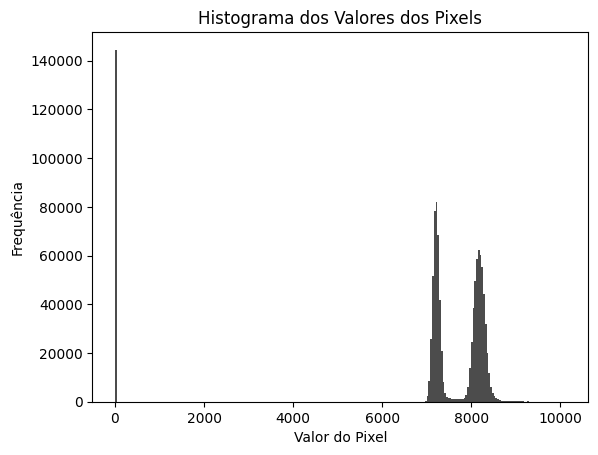

In [ ]:
import pydicom
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

file_name = 'EE004D59'
dicom_data = pydicom.dcmread(file_name)
image_array = dicom_data.pixel_array

image = Image.fromarray(image_array)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

plt.hist(image_array.ravel(), bins=256, color='black', alpha=0.7)
plt.title('Histograma dos Valores dos Pixels')
plt.xlabel('Valor do Pixel')
plt.ylabel('Frequência')
plt.show()

In [ ]:
image_array.min(), image_array.max()

(0, 10125)

Valor mínimo dos pixels: -8192.0
Valor máximo dos pixels: 1933.0
Média dos valores dos pixels: -1502.028169631958
Desvio padrão dos valores dos pixels: 2713.5822560168563


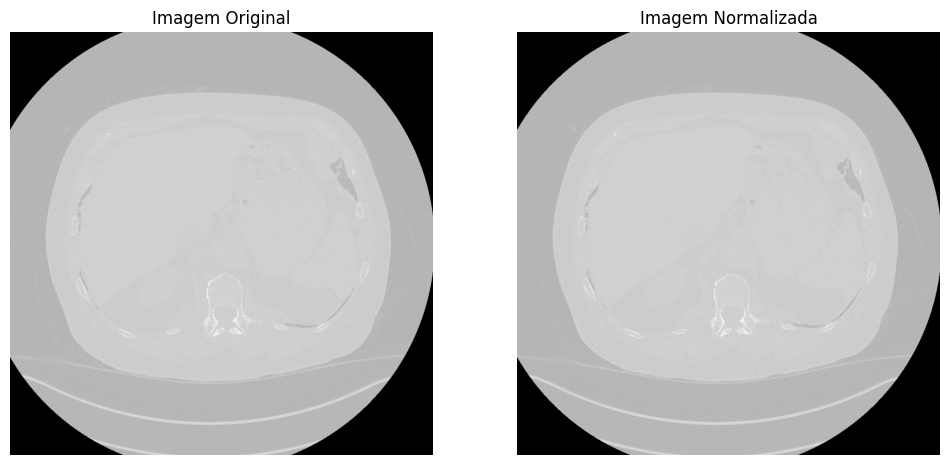

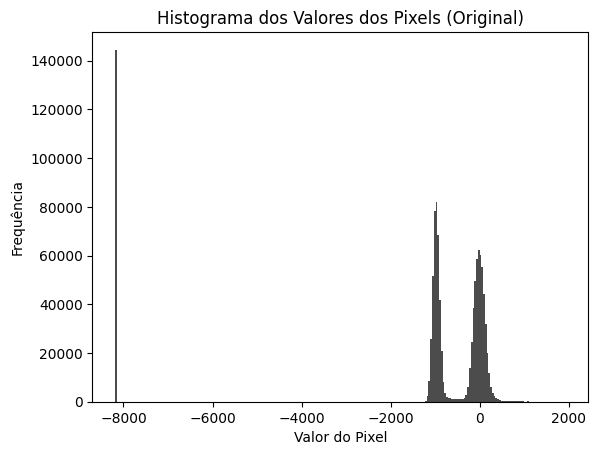

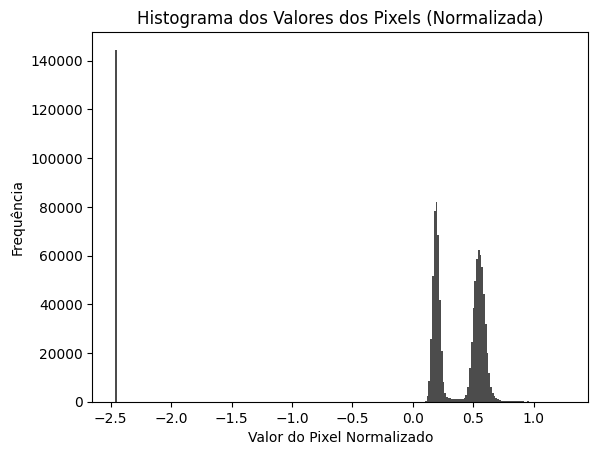

In [ ]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tifffile

file_path = 'EE004D59' 

dicom_data = pydicom.dcmread(file_path)
image_array = dicom_data.pixel_array

rescale_slope = dicom_data.get('RescaleSlope', 1)
rescale_intercept = dicom_data.get('RescaleIntercept', 0)

image_array = image_array * rescale_slope + rescale_intercept

min_pixel_value = image_array.min()
max_pixel_value = image_array.max()

print(f'Valor mínimo dos pixels: {min_pixel_value}')
print(f'Valor máximo dos pixels: {max_pixel_value}')

mean_pixel_value = image_array.mean()
std_pixel_value = image_array.std()

print(f'Média dos valores dos pixels: {mean_pixel_value}')
print(f'Desvio padrão dos valores dos pixels: {std_pixel_value}')

normalized_image_array = (image_array - mean_pixel_value) / std_pixel_value

normalized_image = normalized_image_array.astype(np.float32)
output_file_path = '_image.tif'
tifffile.imwrite(output_file_path, image_array.astype(np.float32))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(normalized_image, cmap='gray')
plt.title('Imagem Normalizada')
plt.axis('off')
plt.show()

plt.hist(image_array.ravel(), bins=256, color='black', alpha=0.7)
plt.title('Histograma dos Valores dos Pixels (Original)')
plt.xlabel('Valor do Pixel')
plt.ylabel('Frequência')
plt.show()

plt.hist(normalized_image_array.ravel(), bins=256, color='black', alpha=0.7)
plt.title('Histograma dos Valores dos Pixels (Normalizada)')
plt.xlabel('Valor do Pixel Normalizado')
plt.ylabel('Frequência')
plt.show()


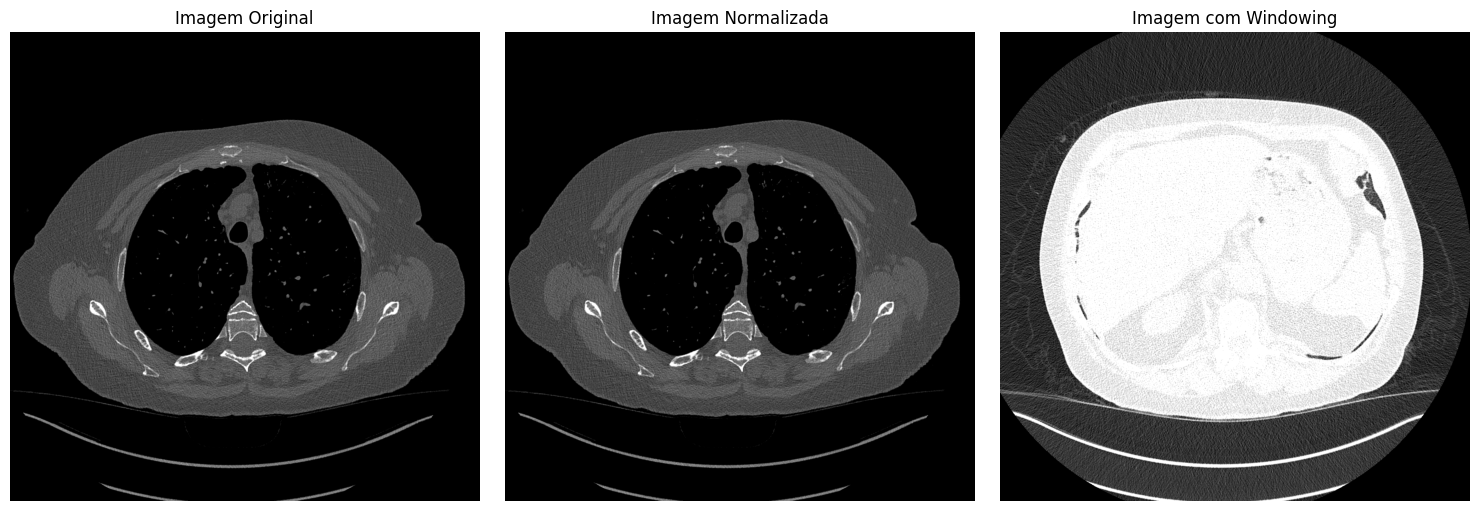

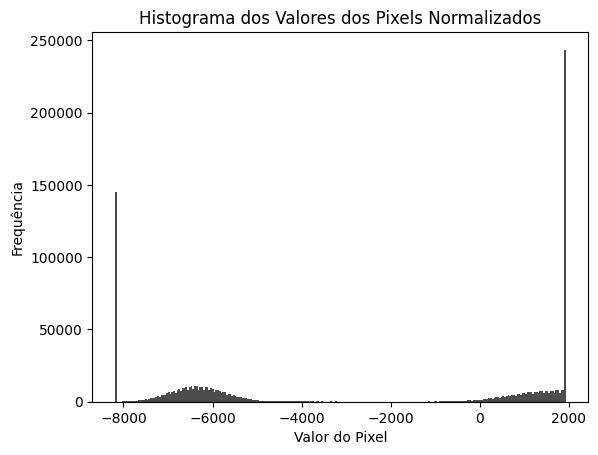

In [ ]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import tifffile

def normalize_ct_image(raw_image, slope, intercept, hu_min=-1000, hu_max=1000):
    hu_image = raw_image * slope + intercept
    hu_image = np.clip(hu_image, hu_min, hu_max)
    normalized_image = (hu_image - hu_min) / (hu_max - hu_min)

    return normalized_image

file_path = 'EE83F30E'

dicom_data = pydicom.dcmread(file_path)

rescale_slope = dicom_data.get('RescaleSlope', 1)
rescale_intercept = dicom_data.get('RescaleIntercept', 0)
image_array = dicom_data.pixel_array * rescale_slope + rescale_intercept
image_array = np.clip(image_array, -600, 1200)
#image_array_normalized = (image_array - image_array[image_array >= 0].min()) / (image_array.max() - image_array[image_array >= 0].min())
image_array_normalized = normalize_ct_image(dicom_data.pixel_array, rescale_slope, rescale_intercept, -600, 1200)
tifffile.imwrite('image.tif', image_array.astype(np.float32))

output_file_path = 'normalized_image.tif'
tifffile.imwrite(output_file_path, image_array_normalized.astype(np.float32))

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(image_array.astype(np.float32), cmap='gray')
ax[0].set_title('Imagem Original')
ax[0].axis('off')

ax[1].imshow(image_array_normalized.astype(np.float32), cmap='gray')
ax[1].set_title('Imagem Normalizada')
ax[1].axis('off')

ax[2].imshow(windowed_image.astype(np.float32), cmap='gray')
ax[2].set_title('Imagem com Windowing')
ax[2].axis('off')

plt.tight_layout()
plt.show()

plt.hist(windowed_image.ravel(), bins=256, color='black', alpha=0.7)
plt.title('Histograma dos Valores dos Pixels Normalizados')
plt.xlabel('Valor do Pixel')
plt.ylabel('Frequência')
plt.show()


In [ ]:
rescale_slope,rescale_intercept

('1.0', '-8192.0')

In [ ]:
image_array[image_array > 0].min()

1933.0

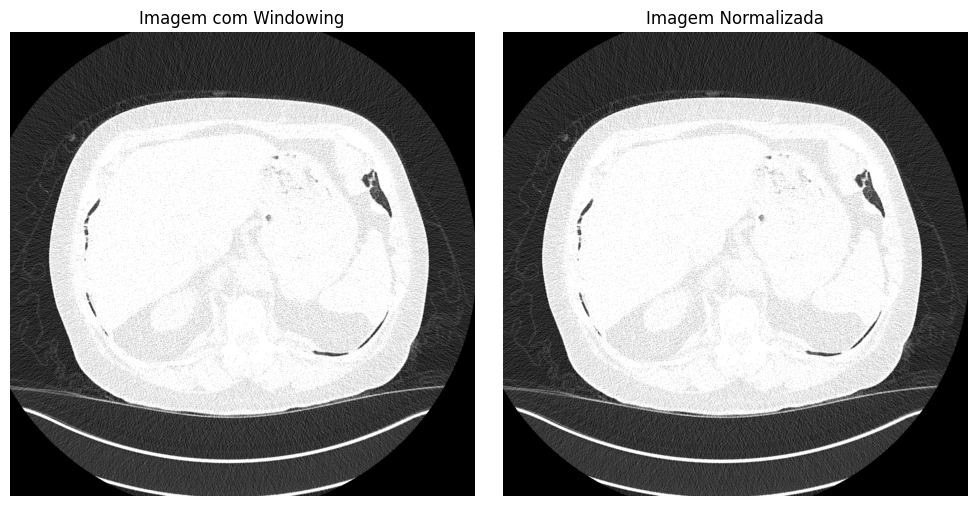

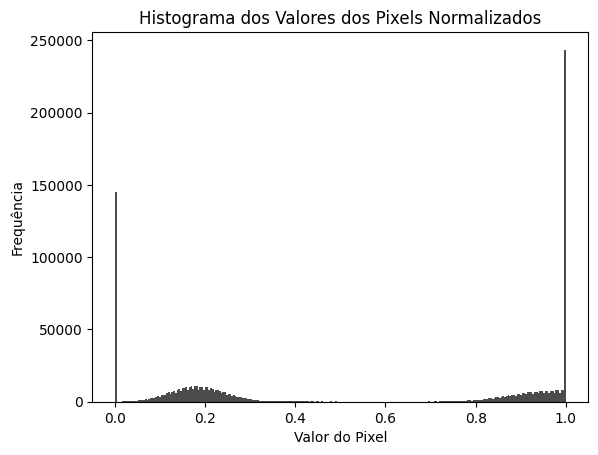

In [ ]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import tifffile

def window_ct(dcm, w, c, ymin, ymax):
    """Windows a CT slice.
    http://dicom.nema.org/medical/dicom/current/output/chtml/part03/sect_C.11.2.html

    Args:
        dcm (pydicom.dataset.FileDataset):
        w: Window Width parameter.
        c: Window Center parameter.
        ymin: Minimum output value.
        ymax: Maximum output value.

    Returns:
        Windowed slice.
    """
    b = dcm.RescaleIntercept
    m = dcm.RescaleSlope
    x = m * dcm.pixel_array + b

    y = np.zeros_like(x)
    y[x <= (c - 0.5 - (w - 1) / 2)] = ymin
    y[x > (c - 0.5 + (w - 1) / 2)] = ymax
    y[(x > (c - 0.5 - (w - 1) / 2)) & (x <= (c - 0.5 + (w - 1) / 2))] = \
        ((x[(x > (c - 0.5 - (w - 1) / 2)) & (x <= (c - 0.5 + (w - 1) / 2))] - (c - 0.5)) / (w - 1) + 0.5) * (
                ymax - ymin) + ymin

    return y

def normalize_ct_image(raw_image, slope, intercept, hu_min=-1000, hu_max=1000):
    hu_image = raw_image * slope + intercept
    hu_image = np.clip(hu_image, hu_min, hu_max)
    normalized_image = (hu_image - hu_min) / (hu_max - hu_min)

    return normalized_image


file_path = 'EE004D59'
dicom_data = pydicom.dcmread(file_path)

rescale_slope = dicom_data.get('RescaleSlope', 1)
rescale_intercept = dicom_data.get('RescaleIntercept', 0)
image_array = dicom_data.pixel_array * rescale_slope + rescale_intercept

ymin = np.min(image_array)
ymax = np.max(image_array)

window_center = float(dicom_data.WindowCenter)
window_width = float(dicom_data.WindowWidth)
windowed_image = window_ct(dicom_data, window_width, window_center, ymin, ymax)

windowed_image_normalized = (windowed_image - windowed_image.min()) / (windowed_image.max() - windowed_image.min())
tifffile.imwrite('windowed_image.tif', windowed_image.astype(np.float32))

output_file_path = 'normalized_windowed_image.tif'
tifffile.imwrite(output_file_path, windowed_image_normalized.astype(np.float32))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(windowed_image, cmap='gray')
ax[0].set_title('Imagem com Windowing')
ax[0].axis('off')

ax[1].imshow(windowed_image_normalized, cmap='gray')
ax[1].set_title('Imagem Normalizada')
ax[1].axis('off')

plt.tight_layout()
plt.show()

plt.hist(windowed_image_normalized.ravel(), bins=256, color='black', alpha=0.7)
plt.title('Histograma dos Valores dos Pixels Normalizados')
plt.xlabel('Valor do Pixel')
plt.ylabel('Frequência')
plt.show()


In [ ]:
dicom_data.WindowCenter

'-600.0'

In [ ]:
(0028, 1050) Window Center                       DS: '-600.0'
(0028, 1051) Window Width                        DS: '1200.0'

In [ ]:
dicom_data

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.1.7.127046.30000024070809163487300002025
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'MIRCTN16NOV2000'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'THRESHOLD', 'CT_SOM10 DET3D', 'T1', 'COUNT_2SRC', 'CONVCT']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.1.7.127046.3

In [ ]:
def window_ct(dcm, w, c, ymin, ymax):
    """Windows a CT slice.
    http://dicom.nema.org/medical/dicom/current/output/chtml/part03/sect_C.11.2.html

    Args:
        dcm (pydicom.dataset.FileDataset):
        w: Window Width parameter.
        c: Window Center parameter.
        ymin: Minimum output value.
        ymax: Maximum output value.

    Returns:
        Windowed slice.
    """
    b = dcm.RescaleIntercept
    m = dcm.RescaleSlope
    x = m * dcm.pixel_array + b

    y = np.zeros_like(x)
    y[x <= (c - 0.5 - (w - 1) / 2)] = ymin
    y[x > (c - 0.5 + (w - 1) / 2)] = ymax
    y[(x > (c - 0.5 - (w - 1) / 2)) & (x <= (c - 0.5 + (w - 1) / 2))] = \
        ((x[(x > (c - 0.5 - (w - 1) / 2)) & (x <= (c - 0.5 + (w - 1) / 2))] - (c - 0.5)) / (w - 1) + 0.5) * (
                ymax - ymin) + ymin

    return y

In [ ]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt

file_path = 'EE004D59'
dicom_data = pydicom.dcmread(file_path)
image_array = dicom_data.pixel_array

if 'RescaleSlope' in dicom_data:
    rescale_slope = dicom_data.RescaleSlope
else:
    rescale_slope = 1

if 'RescaleIntercept' in dicom_data:
    rescale_intercept = dicom_data.RescaleIntercept
else:
    rescale_intercept = 0

image_array = image_array * rescale_slope + rescale_intercept
image_array_normalized = (image_array - image_array.min()) / (image_array.max() - image_array.min())

dicom_normalized = pydicom.Dataset()

dicom_normalized.PatientName = dicom_data.PatientName
dicom_normalized.PatientID = dicom_data.PatientID
dicom_normalized.ImageType = dicom_data.ImageType
dicom_normalized.PixelSpacing = dicom_data.PixelSpacing
dicom_normalized.Rows = dicom_data.Rows
dicom_normalized.Columns = dicom_data.Columns
dicom_normalized.BitsAllocated = 32  
dicom_normalized.BitsStored = 32 
dicom_normalized.HighBit = 31  
dicom_normalized.PixelRepresentation = 1  
dicom_normalized.RescaleIntercept = 0 
dicom_normalized.RescaleSlope = 1 
dicom_normalized.is_little_endian = dicom_data.is_little_endian
dicom_normalized.is_implicit_VR = dicom_data.is_implicit_VR

image_bytes = image_array_normalized.astype(np.float32).tobytes()
dicom_normalized.PixelData = image_bytes

output_file_path = 'normalized_image.dcm'
dicom_normalized.save_as(output_file_path)

print(f'Imagem normalizada salva como {output_file_path}')

Imagem normalizada salva como normalized_image.dcm


In [ ]:
!pip install monai[nibabel,matplotlib,pandas,mlflow,tqdm,pydicom]==1.2.0


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
import pydicom
import numpy as np
from monai.transforms.transform import MapTransform

class LoadDICOM(MapTransform):
    """
    Custom transformation to load DICOM images with slope and intercept adjustment.
    """

    def __init__(self, keys, reader=None):
        super().__init__(keys)
        self.reader = reader or pydicom.dcmread

    def __call__(self, data):
        d = dict(data)

        for key in self.key_iterator(d):
            file_path = d[key]

            dicom_data = self.reader(file_path)
            image_array = dicom_data.pixel_array

            if 'RescaleSlope' in dicom_data:
                rescale_slope = dicom_data.RescaleSlope
            else:
                rescale_slope = 1

            if 'RescaleIntercept' in dicom_data:
                rescale_intercept = dicom_data.RescaleIntercept
            else:
                rescale_intercept = 0

            image_array = image_array * rescale_slope + rescale_intercept

            image_array = np.expand_dims(image_array, axis=0)

            d[key] = image_array
            d['filename'] = file_path.split('/')[-1]

        return d


In [ ]:
from monai.transforms import Compose
from monai.transforms import EnsureChannelFirstd, CopyItemsd, Resized
from monai.transforms import NormalizeIntensityd, ScaleIntensityd, ToTensord, ToMetaTensord

image_dict = {'image': './image/EE83F30E'}

transform = Compose([
    LoadDICOM(keys=['image']),  
    EnsureChannelFirstd(keys=['image'], channel_dim=0),  
    #ScaleIntensityd(keys=['image'], minv=0.0, maxv=1.0),
    CopyItemsd(keys=["image"], times=1, names=["low_res_image"]),
    Resized(keys=["low_res_image"],spatial_size=(512, 512)),
    ToTensord(keys=["image",'low_res_image'])
])

transformed_data = transform(image_dict)


In [ ]:
transformed_data

{'image': metatensor([[[-8192., -8192., -8192.,  ..., -8192., -8192., -8192.],
          [-8192., -8192., -8192.,  ..., -8192., -8192., -8192.],
          [-8192., -8192., -8192.,  ..., -8192., -8192., -8192.],
          ...,
          [-8192., -8192., -8192.,  ..., -8192., -8192., -8192.],
          [-8192., -8192., -8192.,  ..., -8192., -8192., -8192.],
          [-8192., -8192., -8192.,  ..., -8192., -8192., -8192.]]],
        dtype=torch.float64),
 'filename': 'EE83F30E',
 'low_res_image': metatensor([[[-8192., -8192., -8192.,  ..., -8192., -8192., -8192.],
          [-8192., -8192., -8192.,  ..., -8192., -8192., -8192.],
          [-8192., -8192., -8192.,  ..., -8192., -8192., -8192.],
          ...,
          [-8192., -8192., -8192.,  ..., -8192., -8192., -8192.],
          [-8192., -8192., -8192.,  ..., -8192., -8192., -8192.],
          [-8192., -8192., -8192.,  ..., -8192., -8192., -8192.]]])}

In [ ]:
#teste = ((1933.0 - (-8192.0)) * transformed_data['image'][0]) + (- 8192.0)
teste1 = (transformed_data['image'][0] - transformed_data['image'][0].min()) / (transformed_data['image'][0].max() - transformed_data['image'][0].min())


In [ ]:
transformed_data['low_res_image'].shape

torch.Size([1, 512, 512])

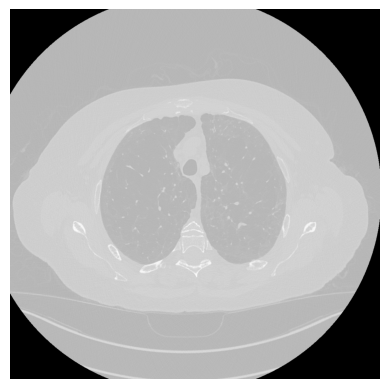

In [ ]:
plt.imshow(teste1, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
!pip install pydicom

In [ ]:
import numpy as np
import pydicom

def window_ct(dcm, w, c, ymin, ymax):
    """Windows a CT slice.

    Args:
        dcm (pydicom.dataset.FileDataset): The DICOM dataset containing the CT slice.
        w: Window Width parameter.
        c: Window Center parameter.
        ymin: Minimum output value.
        ymax: Maximum output value.

    Returns:
        Windowed slice.
    """
    b = dcm.RescaleIntercept
    m = dcm.RescaleSlope
    x = m * dcm.pixel_array + b

    y = np.zeros_like(x)
    y[x <= (c - 0.5 - (w - 1) / 2)] = ymin
    y[x > (c - 0.5 + (w - 1) / 2)] = ymax
    mask = (x > (c - 0.5 - (w - 1) / 2)) & (x <= (c - 0.5 + (w - 1) / 2))
    y[mask] = ((x[mask] - (c - 0.5)) / (w - 1) + 0.5) * (ymax - ymin) + ymin

    return y

def normalize_image(image, ymin, ymax):

    return (image - ymin) / (ymax - ymin)

dcm = pydicom.dcmread('EE83F30E')
window_center = float(dcm.WindowCenter)
window_width = float(dcm.WindowWidth)
ymin = 0
ymax = 1

windowed_image = window_ct(dcm, window_width, window_center, ymin, ymax)
normalized_image = normalize_image(windowed_image, ymin, ymax)

FileNotFoundError: [Errno 2] No such file or directory: 'EE83F30E'

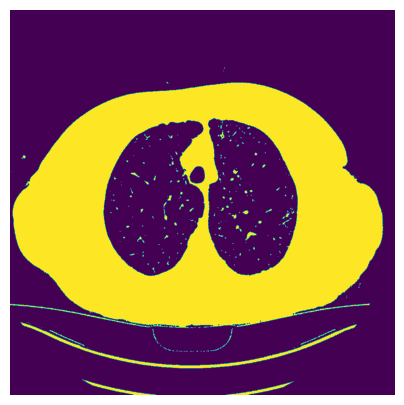

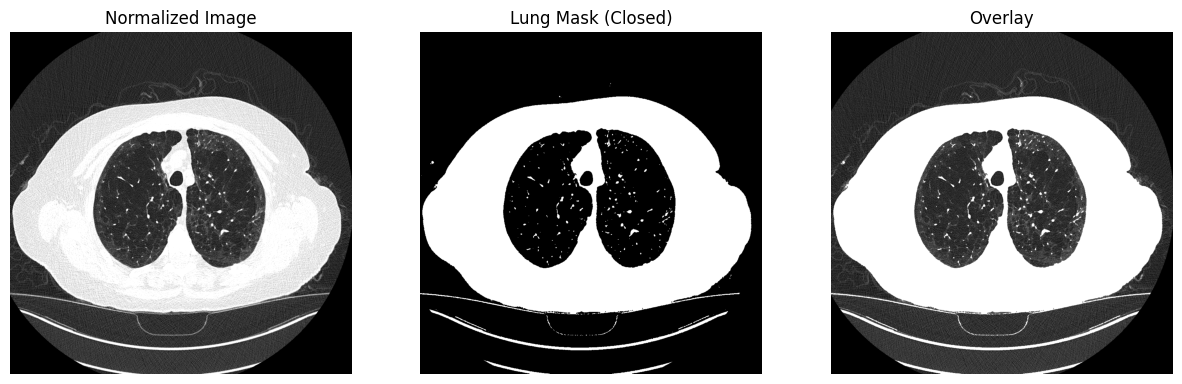

In [ ]:
import numpy as np
import pydicom
import matplotlib.pyplot as plt
from skimage.morphology import binary_closing
import tifffile

def window_ct(dcm, w, c, ymin, ymax):
    """Windows a CT slice.

    Args:
        dcm (pydicom.dataset.FileDataset): The DICOM dataset containing the CT slice.
        w: Window Width parameter.
        c: Window Center parameter.
        ymin: Minimum output value.
        ymax: Maximum output value.

    Returns:
        Windowed slice.
    """
    b = dcm.RescaleIntercept
    m = dcm.RescaleSlope
    x = m * dcm.pixel_array + b

    y = np.zeros_like(x)
    y[x <= (c - 0.5 - (w - 1) / 2)] = ymin
    y[x > (c - 0.5 + (w - 1) / 2)] = ymax
    mask = (x > (c - 0.5 - (w - 1) / 2)) & (x <= (c - 0.5 + (w - 1) / 2))
    y[mask] = ((x[mask] - (c - 0.5)) / (w - 1) + 0.5) * (ymax - ymin) + ymin

    return y

def normalize_image(image, ymin, ymax):
    return (image - ymin) / (ymax - ymin)

def create_lung_mask(image, threshold=0.5):
    """Creates a binary mask to highlight lung structures.

    Args:
        image (np.array): The windowed CT image.
        threshold (float): Relative threshold for segmentation.

    Returns:
        np.array: Binary mask with lung structures highlighted.
    """
    mask = np.zeros_like(image)
    mask[image > threshold] = 1
    return mask

def applying_binary_closing(lung_mask, plotting=True):
    """Apply binary closing to smooth out the edges of the lungs."""
    closed_mask = binary_closing(lung_mask)

    if plotting:
        plt.figure(figsize=[5, 5])
        plt.imshow(closed_mask, cmap='viridis')
        plt.axis('off')
        plt.show()

    return closed_mask

dcm = pydicom.dcmread('./image/EE83F30E')

window_center = float(dcm.WindowCenter)
window_width = float(dcm.WindowWidth)
ymin = 0
ymax = 1

windowed_image = window_ct(dcm, window_width, window_center, ymin, ymax)
normalized_image = normalize_image(windowed_image, ymin, ymax)
tifffile.imwrite('img.tiff', normalized_image.astype(np.float32))

lung_mask = create_lung_mask(normalized_image, threshold=0.5)

closed_lung_mask = applying_binary_closing(lung_mask, plotting=True)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(normalized_image, cmap='gray')
axs[0].set_title('Normalized Image')
axs[0].axis('off')

axs[1].imshow(closed_lung_mask, cmap='gray')
axs[1].set_title('Lung Mask (Closed)')
axs[1].axis('off')

combined = np.maximum(normalized_image, closed_lung_mask)
axs[2].imshow(combined, cmap='gray')
axs[2].set_title('Overlay')
axs[2].axis('off')

plt.show()


Remover tudo menos a parte branca e o pulmão

In [ ]:
!pip install diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.1 MB/s eta 0:00:00


In [ ]:
from transformers import CLIPImageProcessor

model = CLIPImageProcessor.from_pretrained("stabilityai/stable-diffusion-2-1-base", subfolder='feature_extractor')

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
closed_lung_mask = torch.tensor(closed_lung_mask, dtype=torch.float32)

closed_lung_mask = closed_lung_mask.unsqueeze(0).unsqueeze(0)

closed_lung_mask = closed_lung_mask.repeat(1, 3, 1, 1)


In [ ]:
output = model(closed_lung_mask)['pixel_values'][0]

In [ ]:
output_np = np.transpose(output, (1, 2, 0))

In [ ]:
output_np = (output_np - output_np.min()) / (output_np.max() - output_np.min())

In [ ]:
output['pixel_values'][0].shape

(3, 224, 224)

In [ ]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
import torch

pipeline.to("cuda" if torch.cuda.is_available() else "cpu")

prompt = "CT image of the lungs."

image = pipeline(prompt).images[0]

image.save("generated_image.png")

image.show()


  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
pipeline

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.29.2",
  "_name_or_path": "stabilityai/stable-diffusion-2-1-base",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
import torch
import torch.nn as nn
from monai.networks.nets import UNet
from monai.networks.layers import Norm

mask_encoder = UNet(
    spatial_dims=2,
    in_channels=1,
    out_channels=1,
    channels=(16, 32, 64, 128, 256),
    strides=(2, 2, 2, 2),
    num_res_units=2,
    norm=Norm.BATCH,
)


closed_lung_mask_tensor = torch.tensor(closed_lung_mask, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

output = mask_encoder(closed_lung_mask_tensor,)


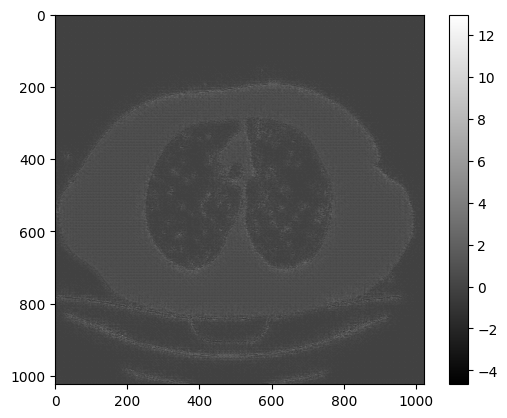

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

output_image = output.squeeze().detach().cpu().numpy()

plt.imshow(output_image, cmap='gray')
plt.colorbar()
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

resnet = models.resnet18(pretrained=True)

modules = list(resnet.children())[:-1]
resnet = nn.Sequential(*modules)

class ResNetEncoder(nn.Module):
    def __init__(self, resnet):
        super(ResNetEncoder, self).__init__()
        self.resnet = resnet
        self.pool = nn.AdaptiveAvgPool2d((8, 8))
        self.flatten = nn.Flatten(start_dim=1)

    def forward(self, x):
        x = self.resnet(x)
        x = self.pool(x)
        x = self.flatten(x)
        return x

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 85.7MB/s]


In [ ]:
model = ResNetEncoder(resnet)

closed_lung_mask_tensor = torch.tensor(closed_lung_mask, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
closed_lung_mask_tensor = closed_lung_mask_tensor.repeat(1, 3, 1, 1)


In [ ]:

output1 = model(closed_lung_mask_tensor)
output1 = output1.view(-1, 512)

print(f"Output shape: {output1.shape}")

Output shape: torch.Size([64, 512])


In [ ]:
model = ResNetEncoder(resnet)

closed_lung_mask_tensor = torch.tensor(closed_lung_mask, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
closed_lung_mask_tensor = closed_lung_mask_tensor.repeat(1, 3, 1, 1)

output = model(closed_lung_mask_tensor)
output = output.view(-1, 512)

print(f"Output shape: {output.shape}")

Output shape: torch.Size([64, 512])


In [ ]:
import torch.nn.functional as F

euclidean_distance = torch.norm(output - output1, p=2).item()
manhattan_distance = torch.norm(output - output1, p=1).item()

In [ ]:
euclidean_distance, manhattan_distance

(5.560196876525879, 787.1076049804688)

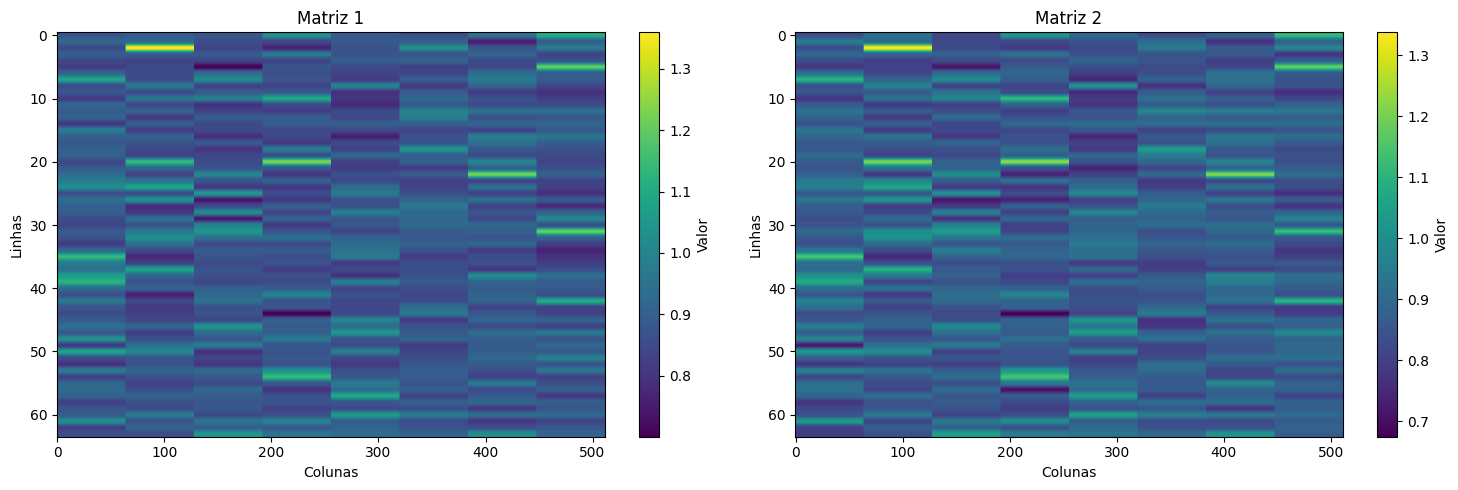

In [ ]:
import torch
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

cax1 = ax[0].imshow(output.detach().numpy(), cmap='viridis', aspect='auto')
ax[0].set_title('Matriz 1')
ax[0].set_xlabel('Colunas')
ax[0].set_ylabel('Linhas')
fig.colorbar(cax1, ax=ax[0], orientation='vertical', label='Valor')

cax2 = ax[1].imshow(output1.detach().numpy(), cmap='viridis', aspect='auto')
ax[1].set_title('Matriz 2')
ax[1].set_xlabel('Colunas')
ax[1].set_ylabel('Linhas')
fig.colorbar(cax2, ax=ax[1], orientation='vertical', label='Valor')

plt.tight_layout()
plt.show()


In [ ]:
!pip install lungmask

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
!pip install --upgrade SimpleITK lungmask

### U-net(R231)

1it [00:00, 28.46it/s]                  

lungmask 2024-08-08 22:51:51 Postprocessing



100%|██████████| 2/2 [00:00<00:00, 2825.40it/s]


(-0.5, 1023.5, 1023.5, -0.5)

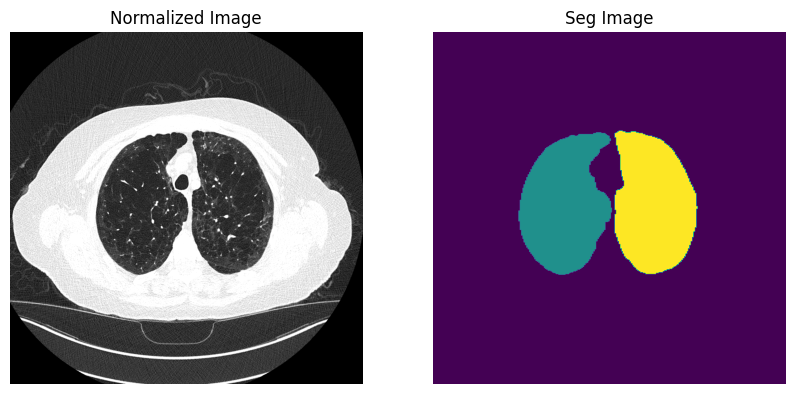

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from lungmask import LMInferer
import SimpleITK as sitk

inferer = LMInferer(modelname='R231CovidWeb')

input_image = sitk.ReadImage('/content/image/EE83F30E')
segmentation = inferer.apply(input_image)

segmentation = segmentation.squeeze()
segmentation_np = np.array(segmentation)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(normalized_image, cmap='gray')
axs[0].set_title('Normalized Image')
axs[0].axis('off')

axs[1].imshow(segmentation_np)
axs[1].set_title('Seg Image')
axs[1].axis('off')


zerar tudo do input com as janelas da máscara do modelo acima pra ter só o pulmão (treinar o aekl)

depois disso, ver como juntar as duas máscaras

### LTRCLobes

1it [00:00, 28.21it/s]                  

lungmask 2024-08-08 22:52:11 Postprocessing



100%|██████████| 11/11 [00:00<00:00, 3519.52it/s]


(-0.5, 1023.5, 1023.5, -0.5)

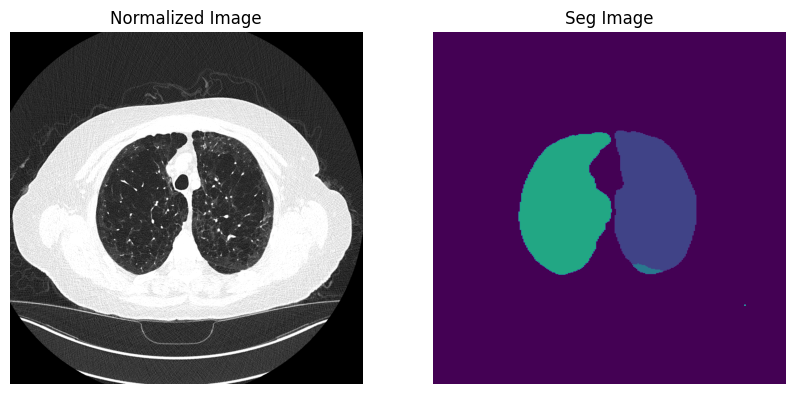

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from lungmask import LMInferer
import SimpleITK as sitk

inferer = LMInferer(modelname='LTRCLobes')

input_image = sitk.ReadImage('/content/image/EE83F30E')
segmentation = inferer.apply(input_image)

segmentation = segmentation.squeeze()
segmentation_np = np.array(segmentation)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(normalized_image, cmap='gray')
axs[0].set_title('Normalized Image')
axs[0].axis('off')

axs[1].imshow(segmentation_np)
axs[1].set_title('Seg Image')
axs[1].axis('off')


### LTRCLobesR231

lungmask 2024-08-08 22:52:29 Apply: LTRCLobes


1it [00:00, 28.92it/s]                  

lungmask 2024-08-08 22:52:29 Postprocessing



100%|██████████| 11/11 [00:00<00:00, 4475.01it/s]


lungmask 2024-08-08 22:52:29 Apply: R231


1it [00:00, 27.84it/s]                  

lungmask 2024-08-08 22:52:29 Postprocessing



100%|██████████| 2/2 [00:00<00:00, 8783.88it/s]

lungmask 2024-08-08 22:52:30 Fusing results... this may take up to several minutes!
lungmask 2024-08-08 22:52:30 Postprocessing



100%|██████████| 31/31 [00:00<00:00, 596.48it/s]


(-0.5, 1023.5, 1023.5, -0.5)

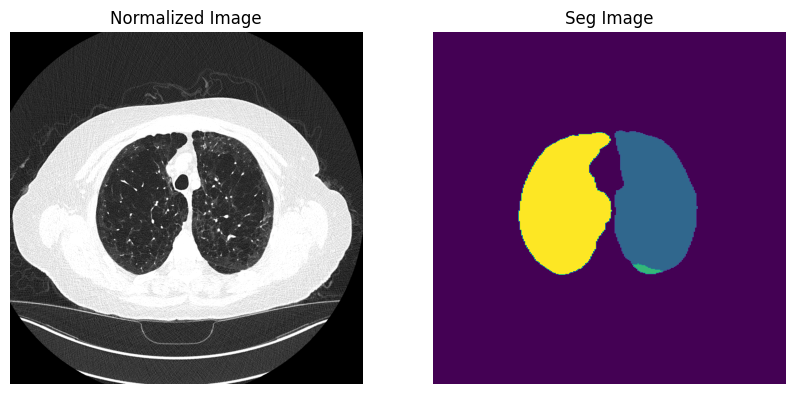

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from lungmask import LMInferer
import SimpleITK as sitk

inferer = LMInferer(modelname='LTRCLobes', fillmodel='R231')

input_image = sitk.ReadImage('/content/image/EE83F30E')
segmentation = inferer.apply(input_image)

segmentation = segmentation.squeeze()
segmentation_np = np.array(segmentation)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(normalized_image, cmap='gray')
axs[0].set_title('Normalized Image')
axs[0].axis('off')

axs[1].imshow(segmentation_np)
axs[1].set_title('Seg Image')
axs[1].axis('off')


### Junção das duas máscaras para podermos filtrar o input

In [ ]:
!pip install pydicom
!pip install --upgrade SimpleITK lungmask

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 52.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pydicom
import matplotlib.pyplot as plt
from skimage.morphology import binary_closing
import tifffile

from lungmask import LMInferer
import SimpleITK as sitk


def window_ct(dcm, w, c, ymin, ymax):
    """Windows a CT slice.

    Args:
        dcm (pydicom.dataset.FileDataset): The DICOM dataset containing the CT slice.
        w: Window Width parameter.
        c: Window Center parameter.
        ymin: Minimum output value.
        ymax: Maximum output value.

    Returns:
        Windowed slice.
    """
    b = dcm.RescaleIntercept
    m = dcm.RescaleSlope
    x = m * dcm.pixel_array + b

    y = np.zeros_like(x)
    y[x <= (c - 0.5 - (w - 1) / 2)] = ymin
    y[x > (c - 0.5 + (w - 1) / 2)] = ymax
    mask = (x > (c - 0.5 - (w - 1) / 2)) & (x <= (c - 0.5 + (w - 1) / 2))
    y[mask] = ((x[mask] - (c - 0.5)) / (w - 1) + 0.5) * (ymax - ymin) + ymin

    return y

def normalize_image(image, ymin, ymax):
    return (image - ymin) / (ymax - ymin)

def create_lung_mask(image, threshold=0.5):
    """Creates a binary mask to highlight lung structures.

    Args:
        image (np.array): The windowed CT image.
        threshold (float): Relative threshold for segmentation.

    Returns:
        np.array: Binary mask with lung structures highlighted.
    """
    mask = np.zeros_like(image)
    mask[image > threshold] = 1
    return mask

def applying_binary_closing(lung_mask, plotting=True):
    """Apply binary closing to smooth out the edges of the lungs."""
    closed_mask = binary_closing(lung_mask)

    if plotting:
        plt.figure(figsize=[5, 5])
        plt.imshow(closed_mask, cmap='viridis')
        plt.axis('off')
        plt.show()

    return closed_mask

inferer = LMInferer(modelname='R231CovidWeb')

input_image = sitk.ReadImage('EE004D59')
segmentation = inferer.apply(input_image)

segmentation = segmentation.squeeze()
segmentation_np = np.array(segmentation)


dcm = pydicom.dcmread('EE004D59')

window_center = float(dcm.WindowCenter)
window_width = float(dcm.WindowWidth)
ymin = 0
ymax = 1

windowed_image = window_ct(dcm, window_width, window_center, ymin, ymax)
normalized_image = normalize_image(windowed_image, ymin, ymax)
tifffile.imwrite('img.tiff', normalized_image.astype(np.float32))

lung_mask = create_lung_mask(normalized_image, threshold=0.8)

closed_lung_mask = applying_binary_closing(lung_mask, plotting=True)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(normalized_image, cmap='gray')
axs[0].set_title('Normalized Image')
axs[0].axis('off')

axs[1].imshow(closed_lung_mask, cmap='gray')
axs[1].set_title('Lung Mask (Closed)')
axs[1].axis('off')

combined = np.maximum(normalized_image, closed_lung_mask)
axs[2].imshow(combined, cmap='gray')
axs[2].set_title('Overlay')
axs[2].axis('off')

plt.show()


Downloading: "https://github.com/JoHof/lungmask/releases/download/v0.0/unet_r231covid-0de78a7e.pth" to /root/.cache/torch/hub/checkpoints/unet_r231covid-0de78a7e.pth
100%|██████████| 119M/119M [00:01<00:00, 106MB/s]


RuntimeError: Exception thrown in SimpleITK ImageFileReader_Execute: /tmp/SimpleITK/Code/IO/src/sitkImageReaderBase.cxx:91:
sitk::ERROR: The file "EE004D59" does not exist.

Downloading: "https://github.com/JoHof/lungmask/releases/download/v0.0/unet_r231covid-0de78a7e.pth" to /root/.cache/torch/hub/checkpoints/unet_r231covid-0de78a7e.pth
100%|██████████| 119M/119M [00:04<00:00, 30.3MB/s]
1it [00:01,  1.31s/it]

lungmask 2024-08-31 14:59:09 Postprocessing



100%|██████████| 2/2 [00:00<00:00, 3033.85it/s]


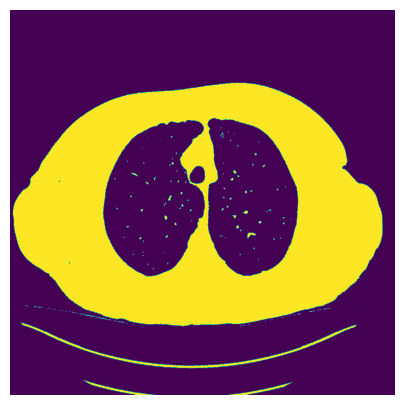

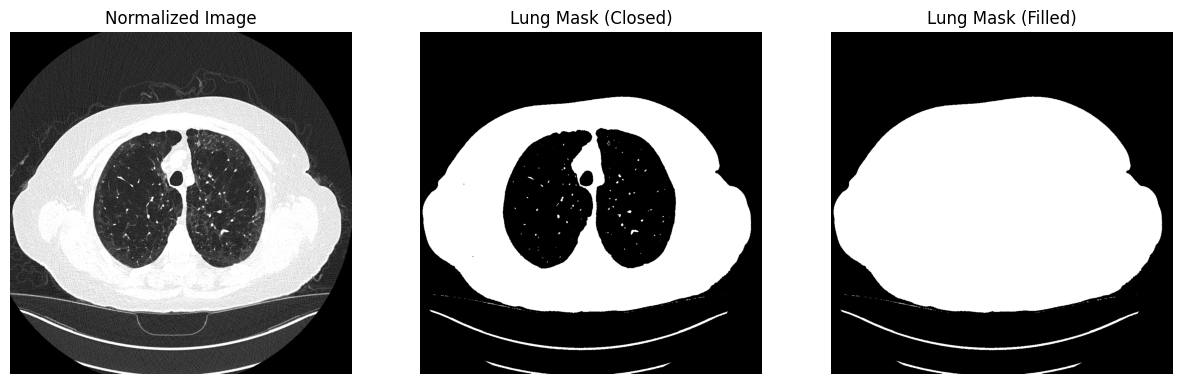

In [ ]:
import numpy as np
import pydicom
import matplotlib.pyplot as plt
from skimage.morphology import binary_closing
import tifffile
import scipy.ndimage as ndimage

from lungmask import LMInferer
import SimpleITK as sitk

def window_ct(dcm, w, c, ymin, ymax):
    b = dcm.RescaleIntercept
    m = dcm.RescaleSlope
    x = m * dcm.pixel_array + b

    y = np.zeros_like(x)
    y[x <= (c - 0.5 - (w - 1) / 2)] = ymin
    y[x > (c - 0.5 + (w - 1) / 2)] = ymax
    mask = (x > (c - 0.5 - (w - 1) / 2)) & (x <= (c - 0.5 + (w - 1) / 2))
    y[mask] = ((x[mask] - (c - 0.5)) / (w - 1) + 0.5) * (ymax - ymin) + ymin

    return y

def normalize_image(image, ymin, ymax):
    return (image - ymin) / (ymax - ymin)

def create_lung_mask(image, threshold=0.5):
    mask = np.zeros_like(image)
    mask[image > threshold] = 1
    return mask

def applying_binary_closing(lung_mask, plotting=True):
    closed_mask = binary_closing(lung_mask)

    if plotting:
        plt.figure(figsize=[5, 5])
        plt.imshow(closed_mask, cmap='viridis')
        plt.axis('off')
        plt.show()

    return closed_mask

def fill_holes_in_mask(mask):
    filled_mask = ndimage.binary_fill_holes(mask).astype(np.uint8)
    return filled_mask

inferer = LMInferer(modelname='R231CovidWeb')

input_image = sitk.ReadImage('EE83F30E')
segmentation = inferer.apply(input_image)

segmentation = segmentation.squeeze()
segmentation_np = np.array(segmentation)

dcm = pydicom.dcmread('EE83F30E')

window_center = float(dcm.WindowCenter)
window_width = float(dcm.WindowWidth)
ymin = 0
ymax = 1

windowed_image = window_ct(dcm, window_width, window_center, ymin, ymax)
normalized_image = normalize_image(windowed_image, ymin, ymax)
tifffile.imwrite('img.tiff', normalized_image.astype(np.float32))

lung_mask = create_lung_mask(normalized_image, threshold=0.8)

closed_lung_mask = applying_binary_closing(lung_mask, plotting=True)

filled_lung_mask = fill_holes_in_mask(closed_lung_mask)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(normalized_image, cmap='gray')
axs[0].set_title('Normalized Image')
axs[0].axis('off')

axs[1].imshow(closed_lung_mask, cmap='gray')
axs[1].set_title('Lung Mask (Closed)')
axs[1].axis('off')

axs[2].imshow(filled_lung_mask, cmap='gray')
axs[2].set_title('Lung Mask (Filled)')
axs[2].axis('off')

plt.show()


In [ ]:
print(np.unique(segmentation_np))
segmentation_np = np.where(segmentation_np >= 1, 1, 0)

[0 1 2]


[0 1]


(-0.5, 1023.5, 1023.5, -0.5)

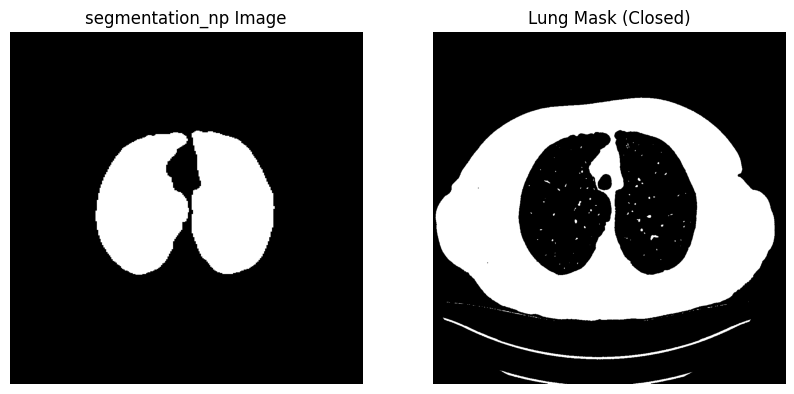

In [ ]:
print(np.unique(segmentation_np))
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(segmentation_np, cmap='gray')
axs[0].set_title('segmentation_np Image')
axs[0].axis('off')

axs[1].imshow(closed_lung_mask, cmap='gray')
axs[1].set_title('Lung Mask (Closed)')
axs[1].axis('off')

(-0.5, 1023.5, 1023.5, -0.5)

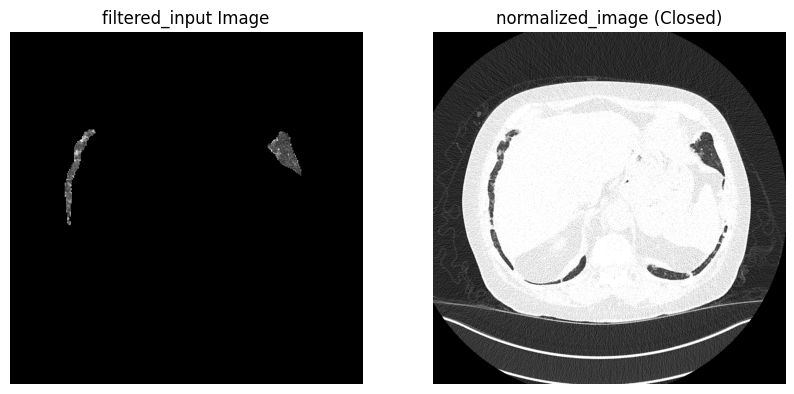

In [ ]:
filtered_input = np.where(segmentation_np == 1, normalized_image, 0)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(filtered_input, cmap='gray')
axs[0].set_title('filtered_input Image')
axs[0].axis('off')

axs[1].imshow(normalized_image, cmap='gray')
axs[1].set_title('normalized_image (Closed)')
axs[1].axis('off')

(-0.5, 1023.5, 1023.5, -0.5)

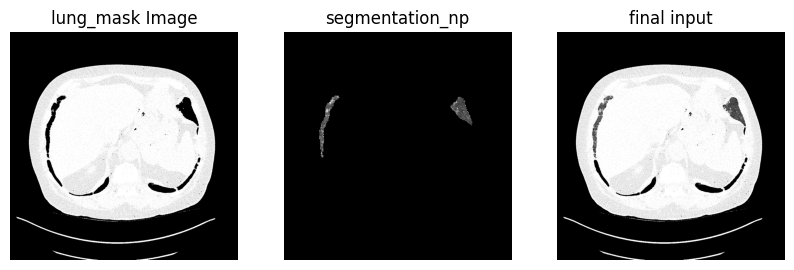

In [ ]:
filtered_with_closed_lung_mask = np.where(closed_lung_mask == 1, normalized_image, 0)
filtered_with_segmentation_np = np.where(segmentation_np == 1, normalized_image, 0)

combined_filtered = np.maximum(filtered_with_closed_lung_mask, filtered_with_segmentation_np)

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(filtered_with_closed_lung_mask, cmap='gray')
axs[0].set_title('lung_mask Image')
axs[0].axis('off')

axs[1].imshow(filtered_with_segmentation_np, cmap='gray')
axs[1].set_title('segmentation_np')
axs[1].axis('off')

axs[2].imshow(combined_filtered, cmap='gray')
axs[2].set_title('final input')
axs[2].axis('off')

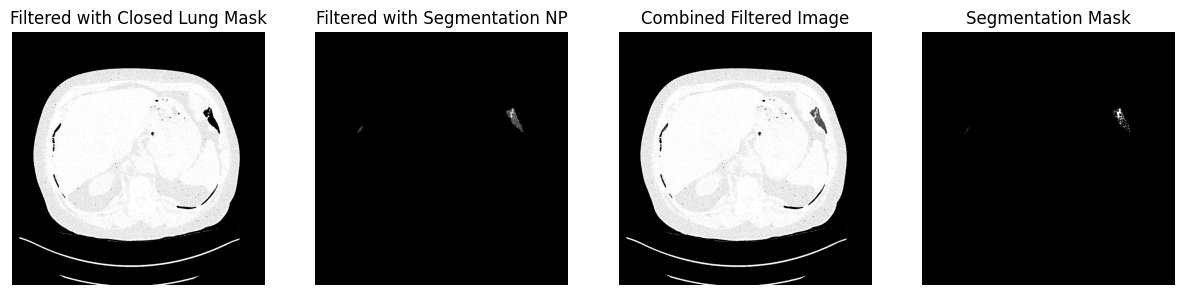

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

filtered_with_closed_lung_mask = np.where(closed_lung_mask == 1, normalized_image, 0)
filtered_with_segmentation_np = np.where(segmentation_np == 1, normalized_image, 0)

combined_filtered = np.maximum(filtered_with_closed_lung_mask, filtered_with_segmentation_np)
segmentation_mask = np.where(filtered_with_segmentation_np >= 0.4, 1, 0)

fig, axs = plt.subplots(1, 4, figsize=(15, 5))

axs[0].imshow(filtered_with_closed_lung_mask, cmap='gray')
axs[0].set_title('Filtered with Closed Lung Mask')
axs[0].axis('off')

axs[1].imshow(filtered_with_segmentation_np, cmap='gray')
axs[1].set_title('Filtered with Segmentation NP')
axs[1].axis('off')

axs[2].imshow(combined_filtered, cmap='gray')
axs[2].set_title('Combined Filtered Image')
axs[2].axis('off')

axs[3].imshow(segmentation_mask, cmap='gray')
axs[3].set_title('Segmentation Mask')
axs[3].axis('off')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

filtered_with_closed_lung_mask = np.where(closed_lung_mask == 1, normalized_image, 0)

filtered_with_segmentation_np = np.where(segmentation_np == 1, normalized_image, 0)

combined_filtered = np.maximum(filtered_with_closed_lung_mask, filtered_with_segmentation_np)

lung_mask_binary = np.where(closed_lung_mask != 0, 1, 0)
segmentation_np_mask = np.where(segmentation_np == 1, 2, 0)
#segmentation_mask_colored = np.where(filtered_with_segmentation_np >= 0.4, 4, 0)

combined_mask = lung_mask_binary + segmentation_np_mask

In [ ]:
segmentation_np = np.where(segmentation_np >= 1, 1, 0)
closed_lung_mask = fill_holes_in_mask(closed_lung_mask)

filtered_with_closed_lung_mask = np.where(closed_lung_mask == 1, normalized_image, 0)
filtered_with_segmentation_np = np.where(segmentation_np == 1, normalized_image, 0)
combined_filtered = np.maximum(filtered_with_closed_lung_mask, filtered_with_segmentation_np)

lung_mask_binary = np.where(closed_lung_mask != 0, 1, 0)
segmentation_np_mask = np.where(segmentation_np == 1, 2, 0)

combined_mask = lung_mask_binary + segmentation_np_mask
combined_mask = np.where(combined_mask == 3, 2, combined_mask)

In [ ]:
print(np.unique(combined_mask))
tifffile.imwrite('mask.tiff', combined_mask.astype(np.uint8))
combined_mask = combined_mask.astype(np.uint8)

[0 1 2]


In [ ]:
np.unique(combined_mask).shape[0]

3

In [ ]:
tifffile.imwrite('mask.tiff', combined_mask.astype(np.float32))


In [ ]:
np.unique(combined_mask.astype(np.uint8) / combined_mask.astype(np.uint8).max())

array([0. , 0.5, 1. ])

In [ ]:
combined_mask = combined_mask.astype(np.uint8)
combined_mask = np.where(combined_mask == 1, 0.5, combined_mask)

In [ ]:
np.unique(combined_mask)

array([0, 1, 2], dtype=uint8)

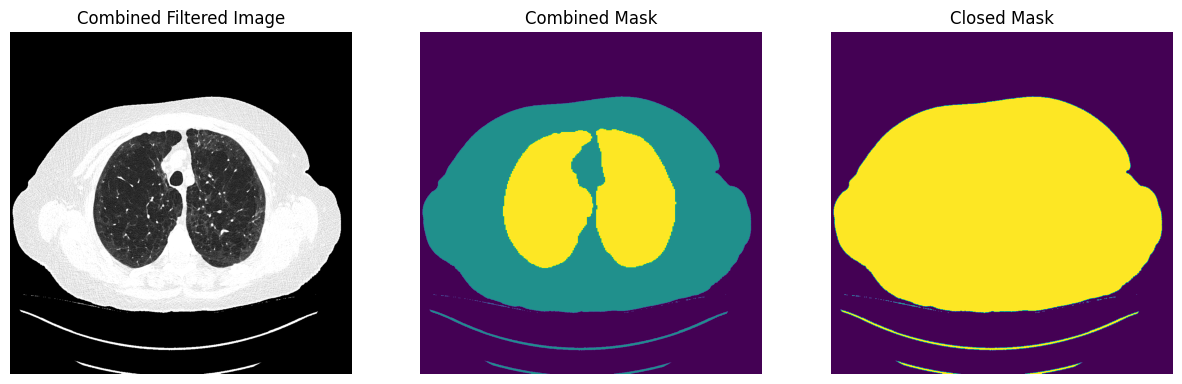

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(combined_filtered, cmap='gray')
axs[0].set_title('Combined Filtered Image')
axs[0].axis('off')

axs[1].imshow(combined_mask, cmap='viridis')
axs[1].set_title('Combined Mask')
axs[1].axis('off')

axs[2].imshow(closed_lung_mask, cmap='viridis')
axs[2].set_title('Closed Mask')
axs[2].axis('off')


plt.show()

In [ ]:
import torch
torch.tensor(tifffile.imread('mask.tiff')).shape

torch.Size([1024, 1024])

In [ ]:
np.unique(combined_mask).shape[0]

2

corrigir as máscaras que so possuem 2 valores únicos

passar o csv pro gean e um método rfe de seleção de features, pca também

olhar na literatura se usam as features radiomicas em modelos de difusão

In [ ]:
combined_mask = combined_mask / combined_mask.max()

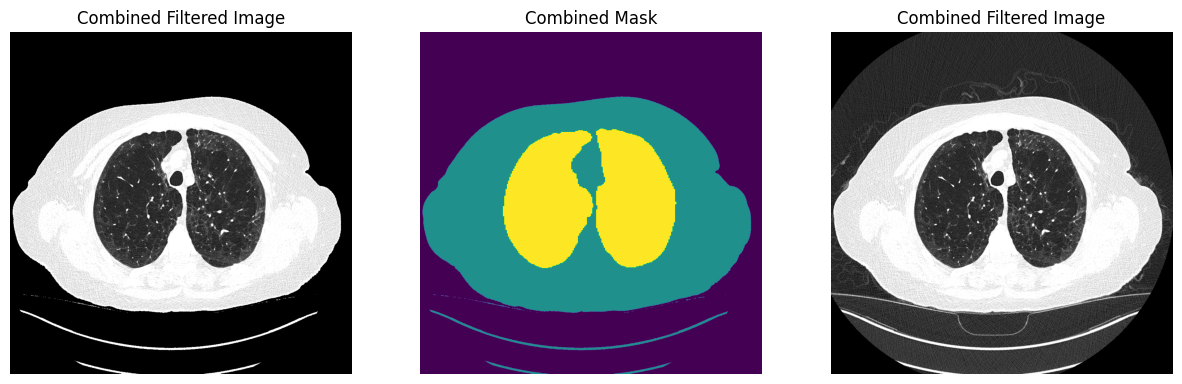

In [ ]:
filtered_full_mask = np.where(combined_mask >= 0.5, normalized_image, 0)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(filtered_full_mask, cmap='gray')
axs[0].set_title('Combined Filtered Image')
axs[0].axis('off')

axs[1].imshow(combined_mask, cmap='viridis')
axs[1].set_title('Combined Mask')
axs[1].axis('off')

axs[2].imshow(normalized_image, cmap='gray')
axs[2].set_title('Combined Filtered Image')
axs[2].axis('off')
plt.show()

TESTE CLIP MODEL STABLE DIFFUSION

In [ ]:
!pip install diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 28.7 MB/s eta 0:00:00


In [ ]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
import torch

pipeline.to("cuda" if torch.cuda.is_available() else "cpu")

prompt = "CT image of the lungs without lungs."

image = pipeline(prompt).images[0]

image.save("generated_image.png")

image.show()


  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
import torch
import torch.nn.functional as F

output_resnet = torch.randn((8, 8, 512))
output_flattened = output_resnet.view(-1, 512)  
output_expanded = output_flattened.unsqueeze(0)  
output_expanded = output_expanded.unsqueeze(3) 
output_final = output_expanded.repeat(1, 1, 1, 512)

print(output_final.shape)

torch.Size([1, 64, 512, 512])


In [ ]:
import torch
import numpy as np
import torch.nn.functional as F

mask_tensor = torch.tensor(torch.randn((1024, 1024)), dtype=torch.float32).unsqueeze(0).unsqueeze(0)
low_res_image = F.interpolate(mask_tensor, size=(512, 512), mode='bilinear', align_corners=False)


<ipython-input-1-d8c9c65266fb>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask_tensor = torch.tensor(torch.randn((1024, 1024)), dtype=torch.float32).unsqueeze(0).unsqueeze(0)


In [ ]:
output_resnet = torch.randn((1, 2000))

In [ ]:
output_resnet[0][1001:1101].shape

torch.Size([100])

In [ ]:
for t in range(1000):
  if t % 200 == 0:
    print(t)

0
200
400
600
800


In [ ]:
output_resnet = torch.randn((8, 8, 512))
output_flattened = output_resnet.view(-1, 512)

In [ ]:
output_flattened.shape

torch.Size([64, 512])

In [ ]:
output_resnet = output_resnet.view(-1, 512).unsqueeze(0)

output_resnet = output_resnet.view(output_resnet.size(0), 1, -1)

In [ ]:
output_resnet.shape

torch.Size([1, 1, 32768])